Description

alue at Risk (VaR) – Project Overview
Value at Risk (VaR) is a statistical measure used to estimate the potential loss in value of a portfolio over a defined period for a given confidence level.
 In simpler terms, VaR answers the question:
"What is the worst expected loss over a given time horizon at a certain confidence level?"
This notebook implements and compares three popular VaR methods:

Historical VaR
Based on actual historical returns
Assumes the past reflects the future
Non-parametric (makes no distribution assumptions)


Parametric VaR (Variance-Covariance)
Assumes returns are normally distributed
Uses the mean and standard deviation of returns
Simple and fast but may underestimate tail risk


Monte Carlo Simulation VaR
Simulates thousands of possible future returns using random sampling
Very flexible (can model non-normality and custom scenarios)
More computationally intensive



Main Steps
Import ETF price data from Yahoo Finance using the yfinance API
Calculate daily log returns for each asset
Construct a portfolio using equal weights
Calculate portfolio returns over time
Compute VaR using all three methods: Historical, Parametric,Monte Carlo
Visualize the results:
Show return distributions
Plot VaR thresholds on histograms
Annotate VaR dollar values on charts

Historical method

In [28]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

years = 5

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [29]:
import yfinance as yf
import pandas as pd

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']
close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    close_df[ticker] = data['Close']

print(close_df)

print(startDate)
print(endDate)


/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/150839872.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/150839872.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/150839872.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/150839872.py:8: FutureWarning: YF.download() has changed argument auto_adj

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2020-07-23  300.713898  77.185860  177.179993  250.539246  152.411011
2020-07-24  298.777130  77.168571  178.699997  248.160202  151.230484
2020-07-27  300.955994  77.116638  182.229996  252.588181  152.531906
2020-07-28  299.047333  77.151237  183.750000  249.374008  151.416367
2020-07-29  302.725159  77.272377  185.130005  252.248291  153.424240
...                ...        ...         ...         ...         ...
2025-07-15  622.140015  72.570000  306.730011  556.719971  306.100006
2025-07-16  624.219971  72.709999  308.260010  557.289978  307.260010
2025-07-17  628.039978  72.730003  307.589996  561.799988  309.260010
2025-07-18  627.580017  72.849998  308.390015  561.260010  309.089996
2025-07-21  628.770020  73.059998  313.130005  564.169983  309.440002

[1254 rows x 5 columns]
2020-07-23 14:51:47.488053
2025-07-22 14:51:47.488053


In [30]:
log_returns = np.log(close_df / close_df.shift(1))
log_returns = log_returns.dropna()
print(close_df.head())


                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2020-07-23  300.713898  77.185860  177.179993  250.539246  152.411011
2020-07-24  298.777130  77.168571  178.699997  248.160202  151.230484
2020-07-27  300.955994  77.116638  182.229996  252.588181  152.531906
2020-07-28  299.047333  77.151237  183.750000  249.374008  151.416367
2020-07-29  302.725159  77.272377  185.130005  252.248291  153.424240


In [31]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [32]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2020-07-24   -0.003092
2020-07-27    0.010482
2020-07-28   -0.003551
2020-07-29    0.009182
2020-07-30   -0.001493
                ...   
2025-07-15   -0.003167
2025-07-16    0.003009
2025-07-17    0.003750
2025-07-18    0.000400
2025-07-21    0.005266
Length: 1253, dtype: float64


In [33]:
days = 30

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2020-09-03    0.052109
2020-09-04    0.048544
2020-09-08    0.016883
2020-09-09    0.035809
2020-09-10    0.015188
                ...   
2025-07-15    0.039912
2025-07-16    0.034401
2025-07-17    0.036082
2025-07-18    0.033474
2025-07-21    0.043725
Length: 1224, dtype: float64


In [34]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

109404.6455588097


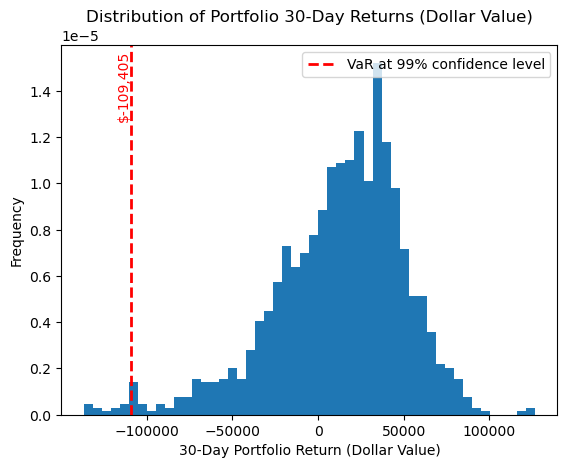

In [35]:
import matplotlib.pyplot as plt

return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

# Plot histogram
plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')

# Add VaR line
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2,
            label=f'VaR at {confidence_interval:.0%} confidence level')

# Annotate VaR value
plt.text(-VaR, plt.ylim()[1]*0.8, f'${-VaR:,.0f}', color='red', fontsize=10, ha='right', rotation=90)

plt.legend()
plt.show()


In [36]:
import numpy as np

# --- Inputs ---
portfolio_value = 100000
confidence_level = 0.99
days = 30  # VaR time horizon

# --- Step 1: Calculate 30-day rolling returns ---
range_returns = historical_returns.rolling(window=days).sum()
range_returns = range_returns.dropna()

# --- Step 2: Compute 99% Historical VaR ---
VaR_30d = -np.percentile(range_returns, 100 * (1 - confidence_level)) * portfolio_value

# --- Step 3: Compute Relative VaR (% of portfolio value) ---
relative_VaR = (VaR_30d / portfolio_value) * 100

# --- Step 4: Classify Risk ---
if relative_VaR < 5:
    risk_level = "Low Risk"
elif 5 <= relative_VaR < 10:
    risk_level = "Moderate Risk"
elif 10 <= relative_VaR <= 15:
    risk_level = "Elevated Risk"
else:
    risk_level = "High Risk"

# --- Output ---
print(f"30-Day VaR (99%): ${VaR_30d:,.2f}")
print(f"Relative VaR: {relative_VaR:.2f}%")
print(f"Risk Classification: {risk_level}")


30-Day VaR (99%): $10,940.46
Relative VaR: 10.94%
Risk Classification: Elevated Risk


In [37]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [38]:


# Download 'Close' prices instead of 'Adj Close'
close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    close_df[ticker] = data['Close']

# Calculate log returns
log_returns = np.log(close_df / close_df.shift(1))
log_returns = log_returns.dropna()

/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/1899291725.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/1899291725.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/1899291725.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/1899291725.py:4: FutureWarning: YF.download() has changed argument auto

In [39]:
portfolio_value = 100000
weights = np.array([1/len(tickers)] * len(tickers))

historical_returns = (log_returns * weights).sum(axis=1)

In [40]:
days = 5
historical_x_day_returns = historical_returns.rolling(window=days).sum()

In [41]:
cov_matrix = log_returns.cov() * 252
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

In [42]:
from scipy.stats import norm

confidence_levels = [0.90, 0.95, 0.99]

VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * (norm.ppf(1 - cl) * portfolio_std_dev * np.sqrt(days / 252) - historical_returns.mean() * days)
    VaRs.append(VaR)

In [43]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ -2,317.26
    95%:          $ -2,914.68
    99%:          $ -4,035.33


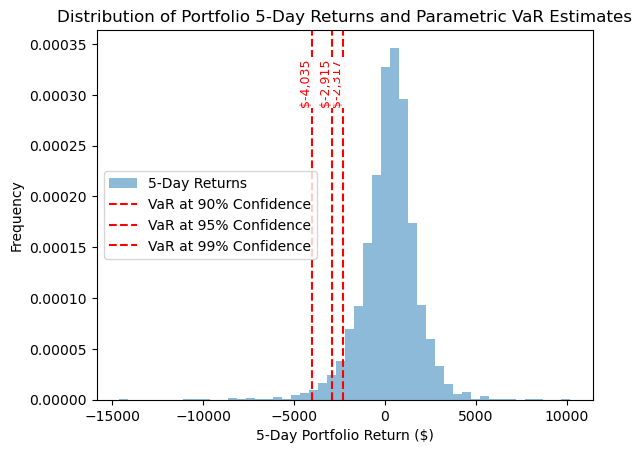

In [44]:
import matplotlib.pyplot as plt

# Convert returns to dollar values
historical_x_day_returns_dollar = historical_x_day_returns * portfolio_value

# Plot histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Plot VaR Lines and annotate their values
for cl, VaR in zip(confidence_levels, VaRs):
    VaR_value = VaR  # ✅ Already negative — no need to flip
    plt.axvline(x=VaR_value, linestyle='--', color='r', label=f'VaR at {int(cl * 100)}% Confidence')
    plt.text(VaR_value, plt.ylim()[1]*0.8, f'${VaR_value:,.0f}', color='red', fontsize=9,
             ha='right', rotation=90, bbox=dict(facecolor='white', edgecolor='none', pad=1))

# Labels and title
plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

Monte Carlo Method

In [45]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [46]:
### Set time from to a certain number of years
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

### Create a list of tickers
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [47]:
close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    close_df[ticker] = data['Close']

# Calculate log returns
log_returns = np.log(close_df / close_df.shift(1))
log_returns = log_returns.dropna()

print(close_df)
print(log_returns)

/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/1554216027.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/1554216027.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/1554216027.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_27769/1554216027.py:3: FutureWarning: YF.download() has changed argument auto

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2010-07-26   84.928856  53.044514  115.519997   40.657558   43.571026
2010-07-27   84.921265  53.018509  113.510002   40.640041   43.517471
2010-07-28   84.373123  53.109566  113.779999   40.316120   43.211422
2010-07-29   83.961998  53.168152  114.290001   40.018452   42.989567
2010-07-30   83.946785  53.246201  115.489998   40.106010   43.035461
...                ...        ...         ...         ...         ...
2025-07-15  622.140015  72.570000  306.730011  556.719971  306.100006
2025-07-16  624.219971  72.709999  308.260010  557.289978  307.260010
2025-07-17  628.039978  72.730003  307.589996  561.799988  309.260010
2025-07-18  627.580017  72.849998  308.390015  561.260010  309.089996
2025-07-21  628.770020  73.059998  313.130005  564.169983  309.440002

[3770 rows x 5 columns]
                 SPY       BND       GLD       QQQ       VTI
Date

In [48]:
### Create a function that will be used to calculate portfolio expected return
#We are assuming that future returns are based on past returns, which is not a reliable assumption.
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

### Create a function that will be used to calculate portfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [49]:
### Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
print(cov_matrix)

              SPY           BND       GLD       QQQ           VTI
SPY  1.182490e-04  7.827804e-07  0.000005  0.000132  1.204343e-04
BND  7.827804e-07  9.604125e-06  0.000009  0.000002  9.890431e-07
GLD  4.914305e-06  9.135842e-06  0.000097  0.000006  5.411023e-06
QQQ  1.323842e-04  1.569995e-06  0.000006  0.000171  1.348291e-04
VTI  1.204343e-04  9.890431e-07  0.000005  0.000135  1.236241e-04


In [50]:
### Create an equally weighted portfolio and find total portfolio expected return and standard deviation
portfolio_value = 100000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

In [51]:
def random_z_score():
    return np.random.normal(0, 1)

### Create a function to calculate scenarioGainLoss
days = 20

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [52]:
### Run 10000 simulations
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [53]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

6872.802708513387


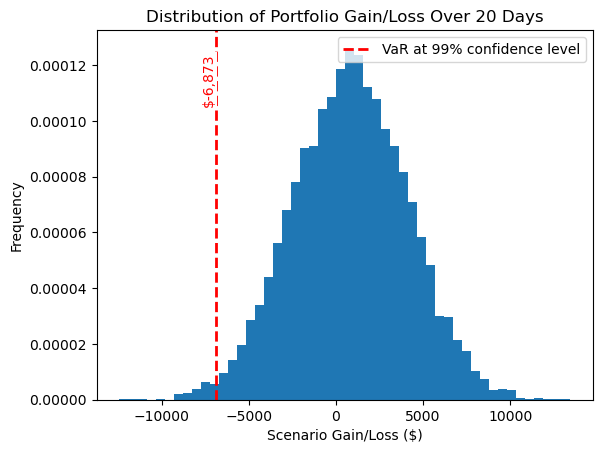

In [54]:
# Plot the results of all 10,000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')

# Plot VaR line
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2,
            label=f'VaR at {confidence_interval:.0%} confidence level')

# Annotate VaR value on the red line
plt.text(-VaR, plt.ylim()[1] * 0.8, f'${-VaR:,.0f}', color='red', fontsize=10,
         ha='right', rotation=90, bbox=dict(facecolor='white', edgecolor='none', pad=1))

plt.legend()
plt.show()
